# Data Exploration

This Jupyter notebook explores the Economia recommendation data from Recombee PosgreSQL dump.

The data are recommendation of the major article. See figure below.

![artiles pane to recommend](img/centrum.png)

In [1]:
from economiarl import db
from matplotlib import pyplot
import numpy

In [2]:
%matplotlib inline

Let's focus on data from 7 days, which is good trade-off between query time from the database
and data size. Note that it should be straight forward to get data from large time window with
the implemented mechanism.

In [3]:
database = 'economiadb'
user = 'podsztavek'

FROM_DATE = '2017-08-01'
TO_DATE = '2017-08-07'

recomms, items, views = db.get_data(database, user, FROM_DATE, TO_DATE)

INFO: getting recommendations
INFO: using cached file: data/recomms-2017-08-01-2017-08-07.csv
INFO: getting views
INFO: using cached file: data/views-2017-08-01-2017-08-07.csv
INFO: getting items
INFO: using cached file: data/items-2017-08-01-2017-08-07.csv
INFO: processing DataFrames


`recomms` DataFrame contains all recommendations and information about
to which user it was made, which item was recommended, when it was recommended
and what the outcome was, if the user clicked on the recommended article the reward is 1
else 0.

In [4]:
recomms.info()
recomms.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809326 entries, 1 to 4820840
Data columns (total 4 columns):
userid       object
itemid       object
timestamp    datetime64[ns]
reward       int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 187.2+ MB


userid                            itemid                  timestamp  \
1  V1XicXh_Lm  24a1733e71f611e784870025900fea04 2017-08-01 00:00:01.012360   
2  E1l-s72_UX  11e92f8830d411e7bc55002590604f2e 2017-08-01 00:00:01.206095   
3   41DsCYDzf  24a1733e71f611e784870025900fea04 2017-08-01 00:00:02.759320   
4  NyWwcmhO8Q  c0bc8e026ce211e784840025900fea04 2017-08-01 00:00:02.928993   
5   EJEo7nuLQ  24a1733e71f611e784870025900fea04 2017-08-01 00:00:04.301182   

   reward  
1       0  
2       0  
3       0  
4       0  
5       0

`items` DataFrame contains features of items' recommendation.
The features are generated by
[LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis#Latent_semantic_indexing).

Note that the user only sees the article's artwork and title
while the features are generated from article's text.

In [5]:
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39262 entries, 0 to 39261
Columns: 201 entries, itemid to 199
dtypes: float64(200), object(1)
memory usage: 60.5+ MB


itemid         0         1         2         3  \
0  dfa57618557b11e790040025900fea04 -0.000151  0.008032  0.006490  0.001005   
1  24a1733e71f611e784870025900fea04 -0.000110  0.032806 -0.017790  0.000410   
2  3aca3ebc663d11e784870025900fea04  0.315072  0.006787 -0.043051 -0.049080   
3  83e7c11c72a111e784870025900fea04 -0.000831  0.024029 -0.025199 -0.005906   
4  27b146a272ce11e7b2b5002590604f2e -0.000931  0.030239 -0.052903 -0.022749   

          4         5         6         7         8    ...          190  \
0  0.002723 -0.001094  0.005100 -0.000270  0.004162    ...     0.003889   
1 -0.001632  0.001676  0.022338 -0.005327 -0.023004    ...     0.001144   
2 -0.047796 -0.088067 -0.075408  0.090675 -0.035804    ...     0.065935   
3 -0.010479  0.006851 -0.012707 -0.008030 -0.006612    ...     0.009277   
4 -0.017719  0.007245 -0.004089 -0.026406 -0.003029    ...     0.012207   

        191       192       193       194       195       196       197  \
0 -0.000567  0.000645  0.003284  0.004853 -0.002358 -0.002981 -0.003714   
1 -0.020814  0.003703  0.010935 -0.004474  0.019129 -0.019740  0.002360   
2  0.062332  0.015369  0.007334 -0.026478 -0.004969 -0.075283 -0.001605   
3 -0.011666  0.010943 -0.013842 -0.005558  0.002602 -0.009491  0.004591   
4  0.001888  0.015768 -0.013924 -0.009897  0.017322 -0.030861  0.021284   

        198       199  
0 -0.004522 -0.000506  
1  0.008432 -0.019918  
2 -0.113824  0.041533  
3 -0.006183  0.000097  
4  0.018245 -0.013753  

[5 rows x 201 columns]

`views` DataFrame contains data about which items an user has view
and time when it happened.

In [6]:
views.info()
views.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665765 entries, 2 to 20492858
Data columns (total 3 columns):
userid       665765 non-null object
itemid       665765 non-null object
timestamp    665765 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 20.3+ MB


userid                            itemid                  timestamp
2   EJQ1bYFc-m  3aca3ebc663d11e784870025900fea04 2017-08-01 00:00:00.954714
14  EkefbJY_I7  31dc6afc736a11e784840025900fea04 2017-08-01 00:00:03.480486
15   EJhUqd64W  24a1733e71f611e784870025900fea04 2017-08-01 00:00:03.535367
20  NyIPQmV_Bm  24a1733e71f611e784870025900fea04 2017-08-01 00:00:04.122093
60  4yxldHdu8X  2a7ea31856a711e7a557002590604f2e 2017-08-01 00:00:10.598950

## Items and Users

Let's find out how big are the user pool and item pool
to which something were recommended on was recommended.
But probably user pool should be users who viewed at least one article.

In [7]:
print('There is {} unique items.'.format(recomms['itemid'].nunique()))
print('There is {} unique users.'.format(recomms['userid'].nunique()))

There is 1140 unique items.
There is 1659973 unique users.


Text(0.5,0,'items')

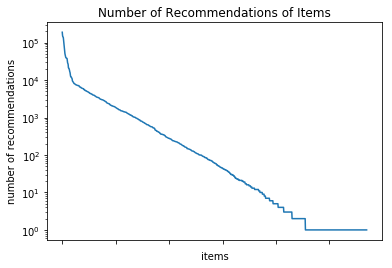

In [8]:
ax = recomms['itemid'].value_counts().plot(logy=True)
ax.set_title('Number of Recommendations of Items')
ax.set_ylabel('number of recommendations')
ax.set_xlabel('items')

The figure about shows that most of items were recommended multiple times
so there should be at least some information about most of them.

Text(0.5,0,'users')

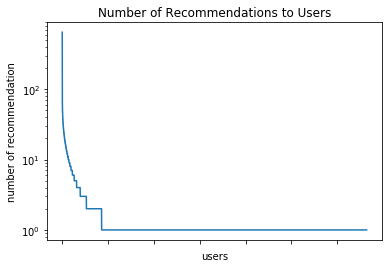

In [9]:
ax = recomms['userid'].value_counts().plot(logy=True)
ax.set_title('Number of Recommendations to Users')
ax.set_ylabel('number of recommendation')
ax.set_xlabel('users')

The figure above show that most user see only small number of recommendation.
Hope that with features it is possible to generalize over groups of users.

In [10]:
print('Number of users with only 1 recommendation: {} from {} users.'.format(
    (recomms['userid'].value_counts() == 1).sum(),
    recomms['userid'].nunique()
))

Number of users with only 1 recommendation: 1445679 from 1659973 users.


## Recommendations

Let's explore the recommendations more.

In [11]:
print('Number of recommendations:', recomms.shape[0])

Number of recommendations: 2809326


There is a strange probably user aggregator `cokoliv` so delete it.

In [12]:
(recomms['userid'] == 'cokoliv').sum()

646

In [13]:
recomms = recomms[recomms['userid'] != 'cokoliv']

unsuccessful:	97.5%
successful:	2.5%


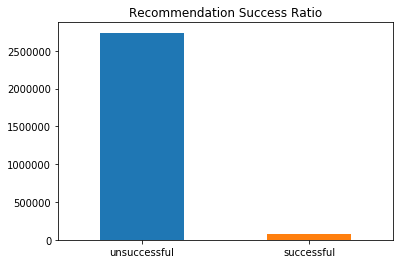

In [14]:
ax = recomms['reward'].value_counts().plot.bar()
ax.set_xticklabels(['unsuccessful', 'successful'])
ax.set_title('Recommendation Success Ratio')
# TODO rotate xlabels
pyplot.xticks(rotation=0)
pyplot.savefig('img/success-ratio.pdf')
print('unsuccessful:\t{:.3}%\nsuccessful:\t{:.2}%'.format(
    *((recomms['reward'].value_counts() / recomms['reward'].count()) * 100)
))

The figure above shows that the data are very unbalanced.
Hope that it is possible to reduce the number of unsuccessful recommedation by data cleaning
and that the algorithms will be able to learn anything.

The high number of unsuccessful attemps is cause by the fact that people go to
centrum.cz to search something or to view their mails
and not to read news.

Below it the number of user for which there were at least one successfull recommendation.
But probably user pool should be users who viewed at least one article.

In [15]:
recomms.loc[recomms['reward'] == 1, 'userid'].nunique()

47225

Successful recommendation per user statistics.

In [16]:
rewards = recomms.groupby(['userid'])['reward'].sum()
print('Number of users with successful recommendation:', (rewards > 0).sum())

Number of users with successful recommendation: 47225


Text(0.5,1,'Users Counts of Successful Recommendations')

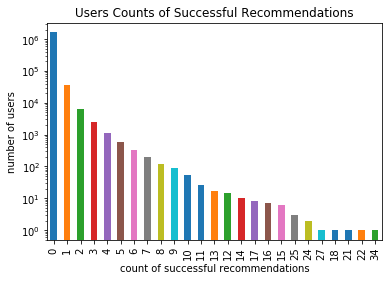

In [17]:
rewards_counts = rewards.value_counts()
ax = rewards_counts.plot.bar(logy=True)
ax.set_ylabel('number of users')
ax.set_xlabel('count of successful recommendations')
ax.set_title('Users Counts of Successful Recommendations')

CPU times: user 1min 33s, sys: 372 ms, total: 1min 33s
Wall time: 1min 33s


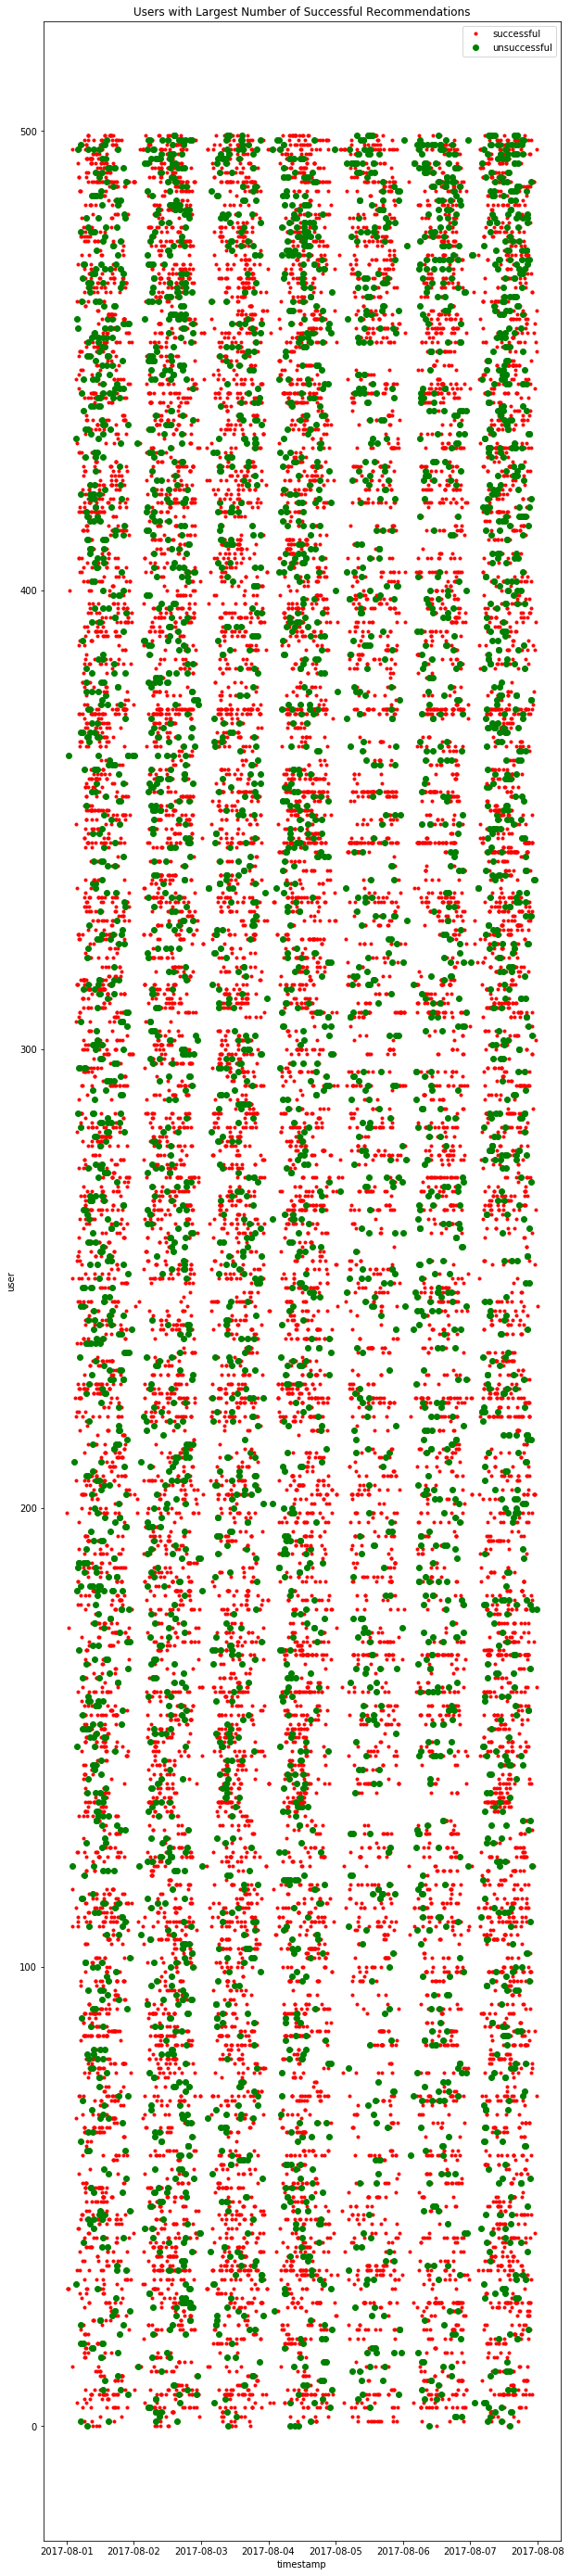

In [18]:
%%time
pyplot.figure(figsize=(10, 50))
for i, userid in enumerate(reversed(rewards.nlargest(500).index)):
    user = recomms[recomms['userid'] == userid]
    unsuc = user.loc[user['reward'] == 0, 'timestamp']
    suc = user.loc[user['reward'] == 1, 'timestamp']
    succ, = pyplot.plot(unsuc, numpy.full(len(unsuc), i), 'r.')
    unsucc, = pyplot.plot(suc, numpy.full(len(suc), i), 'go')
pyplot.legend([succ, unsucc], ['successful', 'unsuccessful'])
pyplot.xlabel('timestamp')
pyplot.ylabel('user')
pyplot.title('Users with Largest Number of Successful Recommendations')

CPU times: user 1min 35s, sys: 128 ms, total: 1min 35s
Wall time: 1min 35s


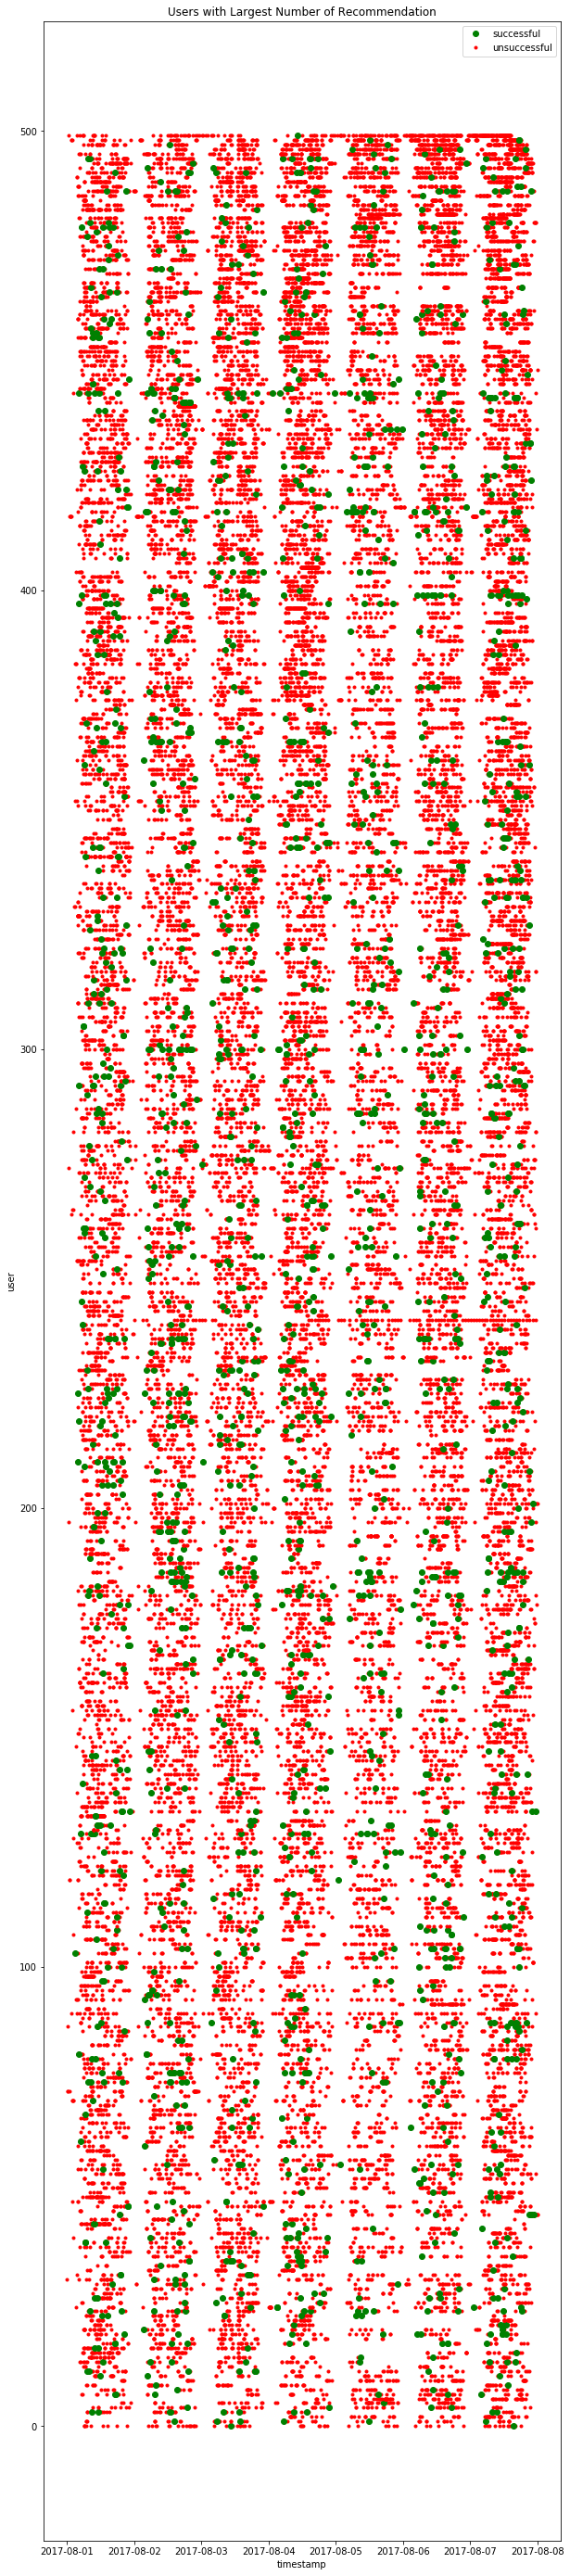

In [19]:
%%time
pyplot.figure(figsize=(10, 50))
users = recomms['userid'].value_counts().nlargest(500).index
for i, userid in enumerate(reversed(users)):
    user = recomms[recomms['userid'] == userid]
    unsuc = user.loc[user['reward'] == 0, 'timestamp']
    suc = user.loc[user['reward'] == 1, 'timestamp']
    unsucc, = pyplot.plot(unsuc, numpy.full(len(unsuc), i), 'r.')
    succ, = pyplot.plot(suc, numpy.full(len(suc), i), 'go')
pyplot.legend([succ, unsucc], ['successful', 'unsuccessful'])
pyplot.xlabel('timestamp')
pyplot.ylabel('user')
pyplot.title('Users with Largest Number of Recommendation')

CPU times: user 1min 33s, sys: 16 ms, total: 1min 33s
Wall time: 1min 33s


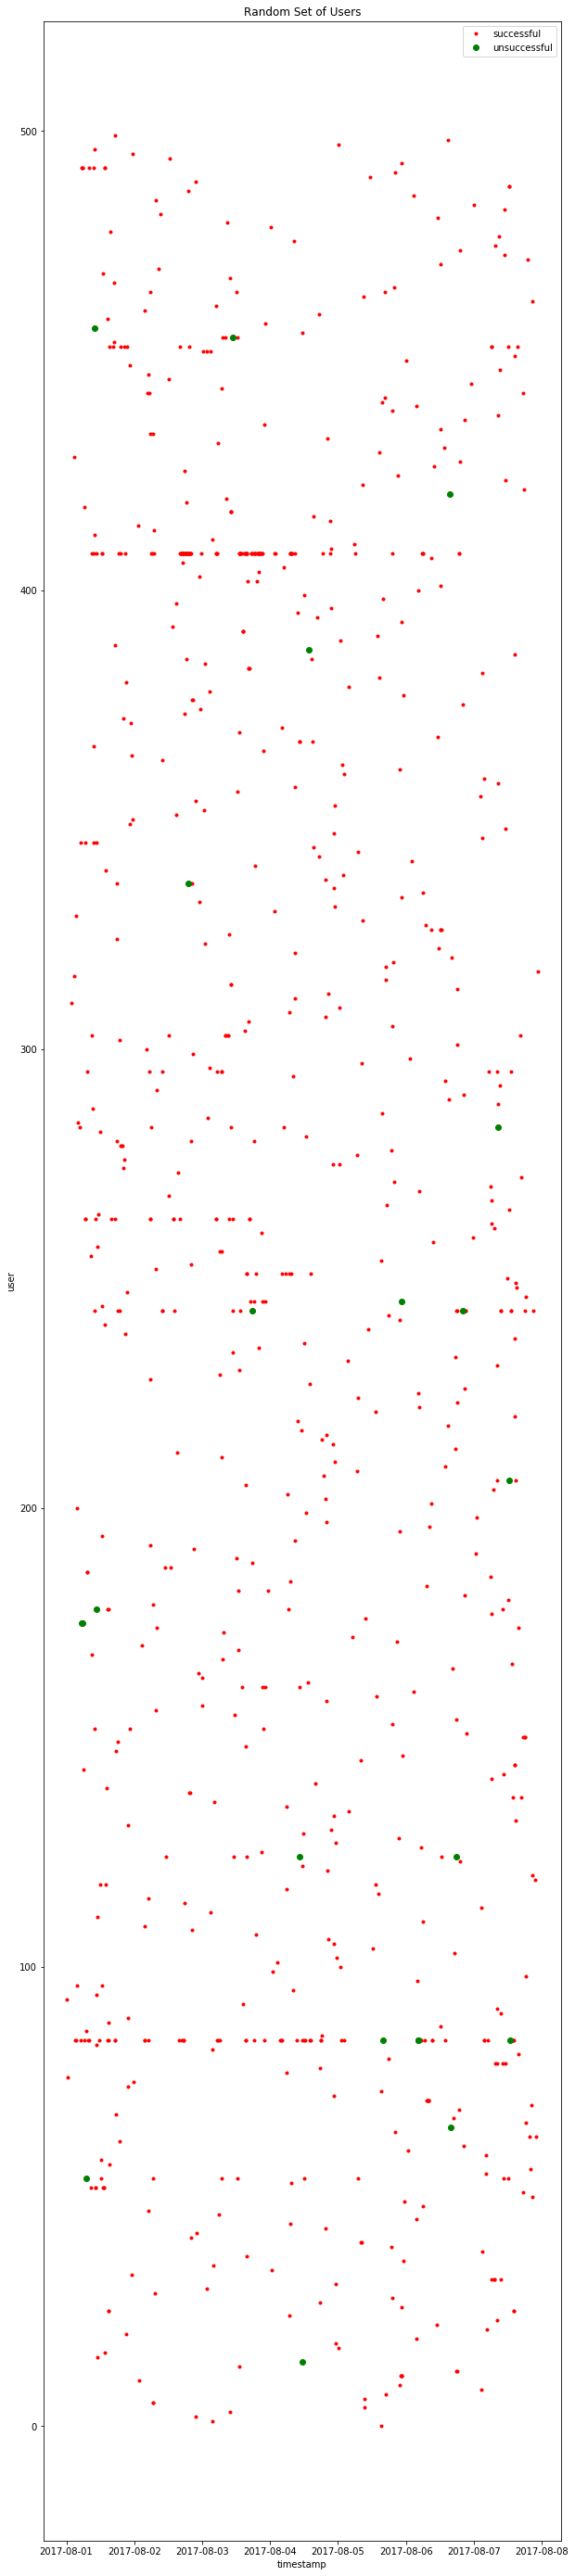

In [20]:
%%time
pyplot.figure(figsize=(10, 50))
users = recomms['userid'].unique()
for i, userid in enumerate(numpy.random.choice(users, size=500, replace=False)):
    user = recomms[recomms['userid'] == userid]
    unsuc = user.loc[user['reward'] == 0, 'timestamp']
    suc = user.loc[user['reward'] == 1, 'timestamp']
    succ, = pyplot.plot(unsuc, numpy.full(len(unsuc), i), 'r.')
    unsucc, = pyplot.plot(suc, numpy.full(len(suc), i), 'go')
pyplot.legend([succ, unsucc], ['successful', 'unsuccessful'])
pyplot.xlabel('timestamp')
pyplot.ylabel('user')
pyplot.title('Random Set of Users')

## View History

Let's explore the user view history.

In [21]:
views.shape[0]

665765

In [22]:
print('There is {} users who viewed at least one article.'.format(views['userid'].nunique()))

There is 165880 users who viewed at least one article.


Intersection of theses user with the users to who were a recommendation make should be the user pool.

In [23]:
recomms_users = recomms['userid'].unique()
views_users = views['userid'].unique()
numpy.intersect1d(recomms_users, views_users).shape[0]

165880

All users which viewed an article got a recommendation.

Below is the number items viewed.
But there is reward information only about the items in `recomms` DataFrame
so it should be the item pool.

In [24]:
views['itemid'].nunique()

11149

See user which reads a lot.
Note that some of them might be robots.

In [25]:
views['userid'].value_counts().nlargest(25)

Ny7fuEWt4W    310
N1xVmrUDZ     204
NkffcX9tLW    161
V1f3mTetV-    151
VyX5ao_YSX    149
N1XvVVr4dz    141
41tTtAmIm     132
NyMyAHbQVQ    127
E1fESukqVb    119
Nk_K7mgKVW    119
Nkf1P5sdzQ    119
4Je-OVyl7m    117
EJZi6j5eH-    117
Nkxnk6ReRG    115
41gXxEfFNZ    114
EybR6dF_B7    113
E1xdirCSBQ    112
Vk8PS1cV7     111
Vkx1aMrYr7    110
VkBu0X8urG    107
VkVtuzLFym    107
EyNcsg48X     105
41bmzeyqV-    104
V1gRF74y1z    103
NkbV0BQKEZ    102
Name: userid, dtype: int64

Text(0.5,0,'users')

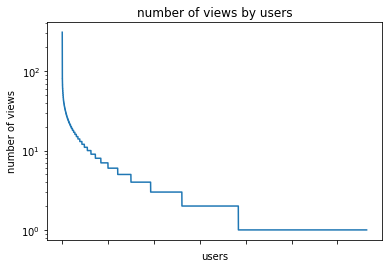

In [26]:
ax = views['userid'].value_counts().plot(logy=True)
ax.set_title('number of views by users')
ax.set_ylabel('number of views')
ax.set_xlabel('users')

Text(0.5,0,'items')

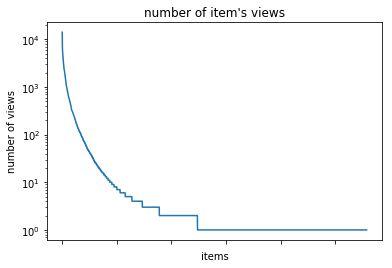

In [27]:
ax = views['itemid'].value_counts().plot(logy=True)
ax.set_title('number of item\'s views')
ax.set_ylabel('number of views')
ax.set_xlabel('items')